## Several fits

## General

In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Linear

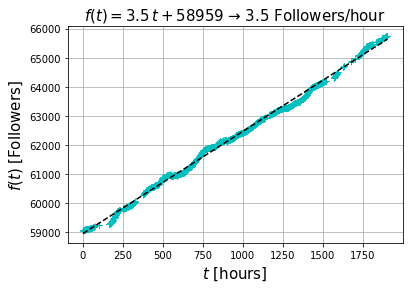

In [2]:
def line(x,m,b):
    return m*x+b

df=pd.read_json('followers.json')
df=df.iloc[-1500:].reset_index(drop=True)
#df=df[-20:].reset_index(drop=True)

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
#df=df[df['hours']>850].reset_index(drop=True)

plt.plot(df['hours'],df['followers'],'c+')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t+%s$ → %s Followers/hour' %(round(m,1),int(b),round(m,1)),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [3]:
df['Δf']=[0]+list(df.followers.values[1:]-df.followers.values[:-1])
df.iloc[-20:]#[-24*1:]#['Δf'].sum()

,followers,date_time,hours,Δf
1480,65692,2022-02-13 17:57:21.792,1885.405252,1
1481,65695,2022-02-13 18:57:36.931,1886.409457,3
1482,65703,2022-02-13 19:57:40.614,1887.410480,8
1483,65706,2022-02-13 20:57:43.830,1888.411374,3
1484,65711,2022-02-13 21:57:46.920,1889.412232,5
1485,65718,2022-02-13 22:57:49.443,1890.412933,7
1486,65718,2022-02-13 23:57:53.359,1891.414021,0
1487,65719,2022-02-14 00:57:56.892,1892.415002,1
1488,65727,2022-02-14 01:57:59.528,1893.415734,8
1489,65732,2022-02-14 02:58:02.259,1894.416493,5


In [15]:
df.Δf.min()

-33

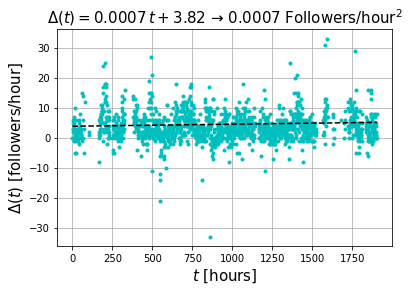

In [4]:
t=np.linspace(0,900)
dfl=df[df['Δf']<41]
plt.plot(dfl['hours'],dfl['Δf'],'c.')
ll,lle=optimize.curve_fit(line,df['hours'],df['Δf'],p0=[-0.1,15])
ml,bl=ll
plt.plot(df['hours'],line(df['hours'],ml,bl),linestyle='--',color='k')
#plt.plot(t,-0.01*t+10)
plt.title('$\Delta(t)=%s\\,t+%s$ → %s Followers/hour${}^2$' %(round(ml,4),round(bl,2),round(ml,4)),fontsize=15)
plt.ylabel('$\Delta(t)$ [followers/hour]',size=15)
plt.xlabel('$t$ [hours]',size=15)
plt.grid()

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [5]:
def hours(y,m,b):
    return (y-b)/m

In [6]:
y=60000
h=int(round(hours(y,m,b),0))
h

482

In [45]:
import datetime

In [46]:
t0=df.loc[0,'date_time']
print(f't0 → {t0}')
print(f'{t0+datetime.timedelta(hours=h)}')

t0 → 2021-08-04 22:06:53.668000
2021-11-25 01:06:53.668000


In [47]:
df['pred']=df['hours'].apply(lambda x: int(m*x+b)) 

Errores

In [48]:
Δm=np.sqrt(le[0,0])
Δb=np.sqrt(le[1,1])

In [49]:
m-Δm,m+Δm

(6.020634189030989, 6.057194954625485)

In [50]:
b-Δb,b+Δb

(43721.22523439737, 43780.021194331086)

In [51]:
df.iloc[-1]['hours']+10*24

3146.237955555585

## Cuadratic

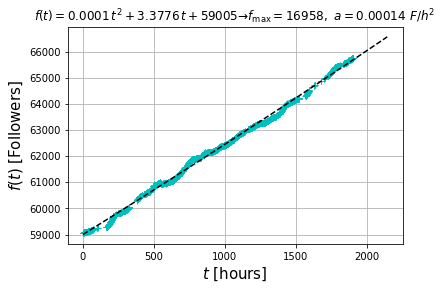

In [45]:
import pandas as pd
def curve(x,a,b,c):
    return a*x**2+b*x+c

df=pd.read_json('followers.json')
df=df.iloc[-1500:].reset_index(drop=True)
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'c+')


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])
a,b,c=l


#Fit:
p=np.poly1d([a,b,c])
v=p.deriv()
tmax=v.roots[0]
t=np.linspace(0,df.iloc[-1]['hours']+10*24)


plt.plot(t,curve(t,a,b,c),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t^2+%s\\,t+%s \\to f_{\\rm{max}}=%s,\\ a=%s\\ F/h^2$ ' 
          %(round(a,4),round(b,4),int(c),int(p(tmax)),2*round(a,5)),fontsize=12)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
#plt.hlines(62000,-100,4000)
plt.savefig('followers.png')
#plt.xlim(3000,4500)
#plt.ylim(60000,64000)

In [49]:
import numbers
import datetime

In [53]:
pred=100000
PREDICTION=isinstance( (pred-p).roots[-1],numbers.Real )

In [56]:
fmax=float('inf')
if p.coefficients[0]<0:
    fmax=p(tmax)

In [60]:
tmax

-24897.596944544857

In [16]:
v(df.hours.iloc[0:df.shape[0]:df.shape[0]//2])

array([3.34348497, 3.444058  ])

In [7]:
v(df.hours.iloc[0:df.shape[0]])

array([3.3776275 , 3.3777633 , 3.37789911, ..., 3.63571179, 3.63584755,
       3.63598333])

Prediction:
$$F(t)=\frac{1}{2}at^2+v_0t+t_0$$

In [62]:
if PREDICTION:
    h=(pred-p).roots[-1]
    t0=df.loc[0,'date_time']
    print(f't0 → {t0}, t_end → {h}')
    print(f'{pred} folowers → {t0+datetime.timedelta(hours=h)}')
else:
    t=df.loc[0,'date_time']    
    print(f'{fmax} max followers → {t+datetime.timedelta(hours=tmax)}')

t0 → 2021-11-27 04:33:02.885000, t_end → 10091.757389442122
100000 folowers → 2023-01-21 16:18:29.486992


## Logistic

\begin{align}
f(x; \mu,s)  & = \frac{e^{-(x-\mu)/s}} {s\left(1+e^{-(x-\mu)/s}\right)^2} \\[4pt]
& =\frac{1}{s\left(e^{(x-\mu)/(2s)}+e^{-(x-\mu)/(2s)}\right)^2} \\[4pt]
& =\frac{1}{4s} \operatorname{sech}^2\left(\frac{x-\mu}{2s}\right).
\end{align}

In [78]:
from scipy import  misc
def logistic(x,A,μ,s):
    return A*np.exp( -(x-μ)/s  )/( s*(1 + np.exp( -(x-μ)/s  )   )  )**2

derivative=np.vectorize(misc.derivative)

df=pd.read_json('followers.json')

df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


t=np.linspace(0,5000,1000)
p0=[20000,100,10]
l,le=optimize.curve_fit(logistic,df['hours'],df['followers'],p0=p0)
A,μ,s=l
l

array([2.93283857e+12, 4.30174009e+03, 3.42131016e+03])

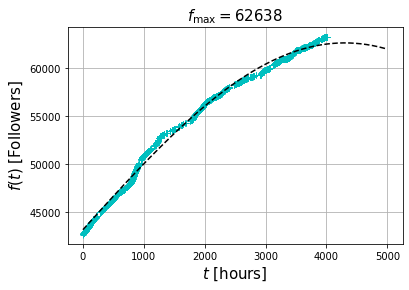

In [79]:
#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
plt.plot(df['hours'],df['followers'],'c+')

#fmax
dlogistic=derivative(lambda t: logistic(t,A,μ,s),t)
nt=dlogistic[dlogistic>0].shape[0]
lfmax=logistic( t[nt],A,μ,s ) 

#Fit:
plt.plot(t,logistic(t,A,μ,s),linestyle='--',color='k')
plt.title(r'$f_{\rm max}=%s$' %int(lfmax),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [80]:
optimize.curve_fit(logistic,df['hours'],df['followers'],p0=[100,1,1])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.19682098e+12, 3.65612497e+03, 3.00886344e+03]),
 array([[1.94873469e+20, 1.63719228e+11, 1.23457036e+11],
        [1.63719228e+11, 1.42640640e+02, 1.02932126e+02],
        [1.23457036e+11, 1.02932126e+02, 7.83832268e+01]]))

In [81]:
t[nt]/24

152.4441107774441

In [170]:
import helium as hell
import pandas as pd
import time

In [26]:
df['followers'].sort_values().unique()

array([42696, 42706, 42716, ..., 56979, 56980, 56983])

In [28]:
pd.__version__

'1.3.0'